# Import required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic') 
%matplotlib inline


from sklearn.linear_model import BayesianRidge, LinearRegression 
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from  sklearn import  linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

from datetime import date
import datetime
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.express as ex


# COVID-19 affects different people in different ways.

In [2]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}
symptoms=pd.DataFrame(data=symptoms,index=range(14))

In [3]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             x="percentage", y="symptom", color='symptom',color_discrete_sequence = ex.colors.cyclical.Edge
              ,title='Symptom of Coronavirus',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Symptoms',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()

# Loading required datasets

In [4]:
confirmed_data = pd.read_csv('D:\COVID_19\datasets_time_series_covid19_confirmed_global.csv')
recovered_data = pd.read_csv('D:\COVID_19\datasets_time_series_covid19_recovered_global.csv')
deaths_data = pd.read_csv('D:\COVID_19\datasets_time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('D:\COVID_19\covid_19_data.csv')


In [5]:
confirmed_data.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/3/20  6/4/20  6/5/20  6/6/20  6/7/20  \
0        0        0        0  ...   17267   18054   18969   19551   20342   
1        0        0        0  ...    1184    1197    1212    1232    1246   
2        0        0        0  ...    9733    9831    9935   10050   10154   
3        0        0        0  ...     851     852     852     852     852   
4        0        0        0  ...      86      86      86      88      91   

   6/8/20  6/9/20  6/10/20  6/11/20  6/12/20  
0   20917   21459    22142    22890    23546  
1    1263    1299     1341     1385     1416  
2   10265   10382    10484    10589    10698  
3     852     852      852      852      853  
4      92      96      113      118      130  

[5 rows x 147 columns]

In [6]:
recovered_data.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/3/20  6/4/20  6/5/20  6/6/20  6/7/20  \
0        0        0        0  ...    1522    1585    1762    1830    1875   
1        0        0        0  ...     898     898     910     925     938   
2        0        0        0  ...    6218    6297    6453    6631    6717   
3        0        0        0  ...     735     738     741     741     744   
4        0        0        0  ...      18      18      21      24      24   

   6/8/20  6/9/20  6/10/20  6/11/20  6/12/20  
0    2171    2651     3013     3326     3928  
1     945     960      980     1001     1034  
2    6799    6951     7074     7255     7322  
3     751     757      759      780      781  
4      38      38       40       41       42  

[5 rows x 147 columns]

In [7]:
deaths_data.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/3/20  6/4/20  6/5/20  6/6/20  6/7/20  \
0        0        0        0  ...     294     300     309     327     357   
1        0        0        0  ...      33      33      33      34      34   
2        0        0        0  ...     673     681     690     698     707   
3        0        0        0  ...      51      51      51      51      51   
4        0        0        0  ...       4       4       4       4       4   

   6/8/20  6/9/20  6/10/20  6/11/20  6/12/20  
0     369     384      405      426      446  
1      34      34       34       35       36  
2     715     724      732      741      751  
3      51      51       51       51       51  
4       4       4        4        5        5  

[5 rows x 147 columns]

In [8]:
latest_data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0

In [9]:
latest_data.shape

(53927, 8)

In [10]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53927 entries, 0 to 53926
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              53927 non-null  int64 
 1   ObservationDate  53927 non-null  object
 2   Province/State   32870 non-null  object
 3   Country/Region   53927 non-null  object
 4   Last Update      53927 non-null  object
 5   Confirmed        53927 non-null  int64 
 6   Deaths           53927 non-null  int64 
 7   Recovered        53927 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.3+ MB


# We will convert ObservationDate and Last Update to datetime since they are currently taken as object
# The counts for 'Confirmed', 'Deaths' and 'Recovered' will be converted to int

In [11]:
latest_data['ObservationDate'] = pd.to_datetime(latest_data['ObservationDate'])
latest_data['Last Update'] = pd.to_datetime(latest_data['Last Update'])
latest_data['Confirmed']=latest_data['Confirmed'].astype('int')
latest_data['Deaths']=latest_data['Deaths'].astype('int')
latest_data['Recovered']=latest_data['Recovered'].astype('int')

In [12]:
recent = latest_data[['ObservationDate']][-1:].max()
data_update=latest_data.loc[latest_data.ObservationDate==pd.Timestamp(recent['ObservationDate'])]

data_update

SNo ObservationDate      Province/State  Country/Region  \
53198  53199      2020-06-30                 NaN     Afghanistan   
53199  53200      2020-06-30                 NaN         Albania   
53200  53201      2020-06-30                 NaN         Algeria   
53201  53202      2020-06-30                 NaN         Andorra   
53202  53203      2020-06-30                 NaN          Angola   
...      ...             ...                 ...             ...   
53922  53923      2020-06-30           Zacatecas          Mexico   
53923  53924      2020-06-30  Zakarpattia Oblast         Ukraine   
53924  53925      2020-06-30   Zaporizhia Oblast         Ukraine   
53925  53926      2020-06-30            Zhejiang  Mainland China   
53926  53927      2020-06-30     Zhytomyr Oblast         Ukraine   

              Last Update  Confirmed  Deaths  Recovered  
53198 2020-01-07 04:33:00      31517     746      14131  
53199 2020-01-07 04:33:00       2535      62       1459  
53200 2020-01-07 04:33:00      13907     912       9897  
53201 2020-01-07 04:33:00        855      52        799  
53202 2020-01-07 04:33:00        284      13         93  
...                   ...        ...     ...        ...  
53922 2020-01-07 04:33:00        908      96        626  
53923 2020-01-07 04:33:00       2889      91        943  
53924 2020-01-07 04:33:00        572      17        418  
53925 2020-01-07 04:33:00       1269       1       1267  
53926 2020-01-07 04:33:00       1404      29        746  

[729 rows x 8 columns]

In [13]:
data_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     169
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

# Out of the 53297 records we are now left with only 729 and many of the records dont have a Province defined.
# These are mostly provinces that are not part of China
# Wherever Province is null, we replace it with the Country name and we group Mainland China and China together in China

In [14]:
data_update['Province/State']=data_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
latest_data['Province/State']=latest_data.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)


In [15]:
data_update['Country/Region']=data_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
latest_data['Country/Region']=latest_data.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)


In [16]:

lebal =LabelEncoder()
data_update['ProvinceID'] = lebal.fit_transform(data_update['Province/State'])
data_update['CountryID']=lebal.fit_transform(data_update['Country/Region'])
data_update.head()

SNo ObservationDate Province/State Country/Region  \
53198  53199      2020-06-30    Afghanistan    Afghanistan   
53199  53200      2020-06-30        Albania        Albania   
53200  53201      2020-06-30        Algeria        Algeria   
53201  53202      2020-06-30        Andorra        Andorra   
53202  53203      2020-06-30         Angola         Angola   

              Last Update  Confirmed  Deaths  Recovered  ProvinceID  CountryID  
53198 2020-01-07 04:33:00      31517     746      14131           3          0  
53199 2020-01-07 04:33:00       2535      62       1459          10          1  
53200 2020-01-07 04:33:00      13907     912       9897          12          2  
53201 2020-01-07 04:33:00        855      52        799          22          3  
53202 2020-01-07 04:33:00        284      13         93          23          4

In [17]:
print(latest_data['Country/Region'].unique())
print("\nNumber of countries impacted by COVID-19:",len(latest_data['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

In [18]:
cols = confirmed_data.keys()

# Get all the dates of the outbreak

In [19]:
confirmed = confirmed_data.loc[:, cols[4]:cols[-1]]
deaths = deaths_data.loc[:, cols[4]:cols[-1]]
recovered = recovered_data.loc[:, cols[4]:cols[-1]]

In [20]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

india_cases = []
india_deaths = []
india_recovered = [] 

In [21]:

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    
    
    
#  world confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    
    
    
   # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum) 
    
     # case studies of INDIA
    india_cases.append(confirmed_data[confirmed_data['Country/Region']=='India'][i].sum())
    india_deaths.append(deaths_data[deaths_data['Country/Region']=='India'][i].sum())
    india_recovered.append(recovered_data[recovered_data['Country/Region']=='India'][i].sum())   

In [22]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [23]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
india_daily_increase = daily_increase(india_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
india_daily_death = daily_increase(india_deaths)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
india_daily_recovery = daily_increase(india_recovered)

In [24]:
days_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# Future Forecasting

In [25]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

# Converting integer into datetime for better visualization

In [26]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Splitting X(days_1_22 ) and y(world_cases)  into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(days_1_22[50:],world_cases[50:],test_size=0.16,random_state = 1,shuffle=False)

# For predicting , i am using Linear Regression , Bayesian Ridge, and Support Vector.

## 1. Polynomial Regression:- 


In [28]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_future_forcast = poly.fit_transform(future_forcast)

In [29]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_linear_prediction = linear_model.predict(poly_X_test)
linear_pred = linear_model.predict(poly_future_forcast)


MAE: 15694.283428351084
MSE: 372813188.7112921
[[ 3.01342433e+07 -1.68106231e+06  3.49892174e+04 -3.40306168e+02
   1.61353432e+00 -2.96125631e-03]]


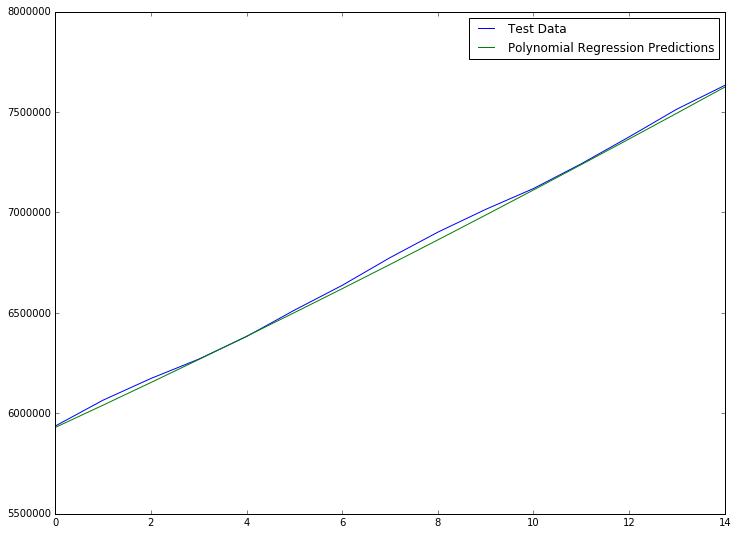

In [30]:
print('MAE:', mean_absolute_error(test_linear_prediction, y_test))
print('MSE:',mean_squared_error(test_linear_prediction, y_test))
print(linear_model.coef_)

plt.figure(figsize=(12,9))
plt.plot(y_test)
plt.plot(test_linear_prediction)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

##  2.  Bayesian Ridge Polynomial Regression:-

In [31]:
bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_X_train = bayesian_poly.fit_transform(X_train)
bayesian_poly_X_test = bayesian_poly.fit_transform(X_test)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [32]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]


bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}


bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [33]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': True,
 'lambda_2': 0.001,
 'lambda_1': 1e-07,
 'alpha_2': 1e-06,
 'alpha_1': 0.001}

In [34]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_prediction = bayesian_confirmed.predict(bayesian_poly_X_test)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)


MAE: 355613.31853834394
MSE: 132740955861.86653


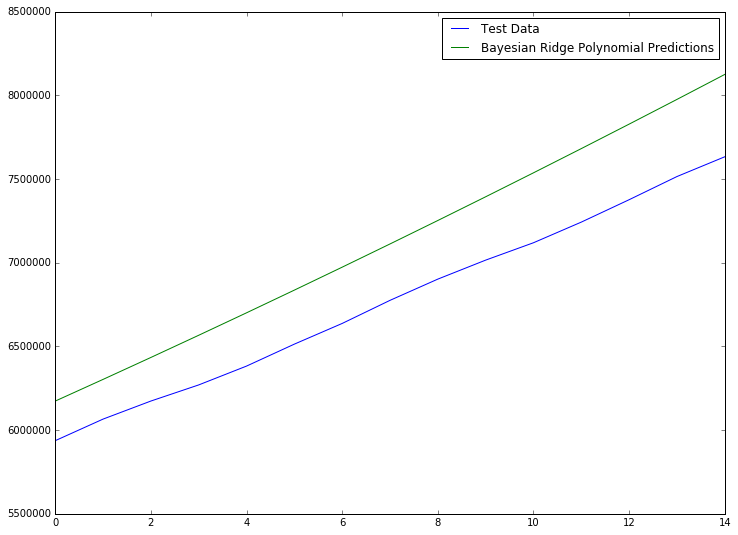

In [35]:
print('MAE:', mean_absolute_error(test_bayesian_prediction, y_test))
print('MSE:',mean_squared_error(test_bayesian_prediction, y_test))
plt.figure(figsize=(12, 9))
plt.plot(y_test)
plt.plot(test_bayesian_prediction)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

## 3. Support Vector Machine:-

In [36]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train, y_train)
svm_prediction = svm_confirmed.predict(future_forcast)

MAE: 223150.2092236257
MSE: 59365677056.10133


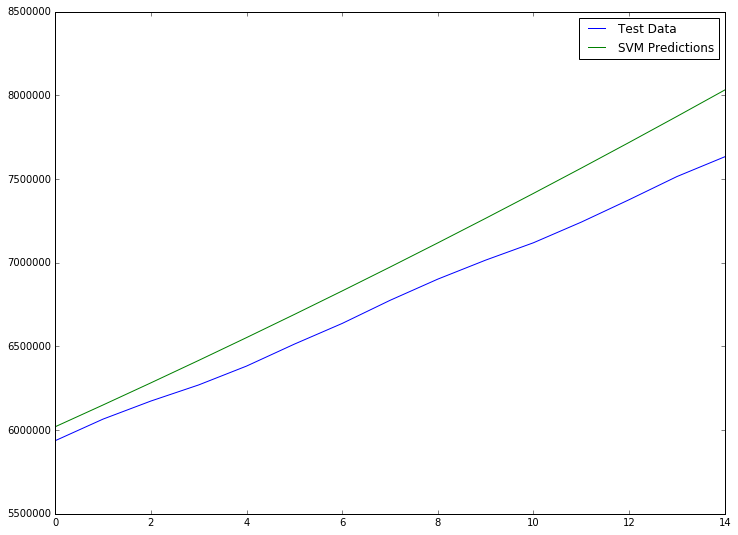

In [37]:
svm_test_prediction = svm_confirmed.predict(X_test)
plt.figure(figsize=(12, 9))
plt.plot(y_test)
plt.plot(svm_test_prediction)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_prediction, y_test))
print('MSE:',mean_squared_error(svm_test_prediction, y_test))

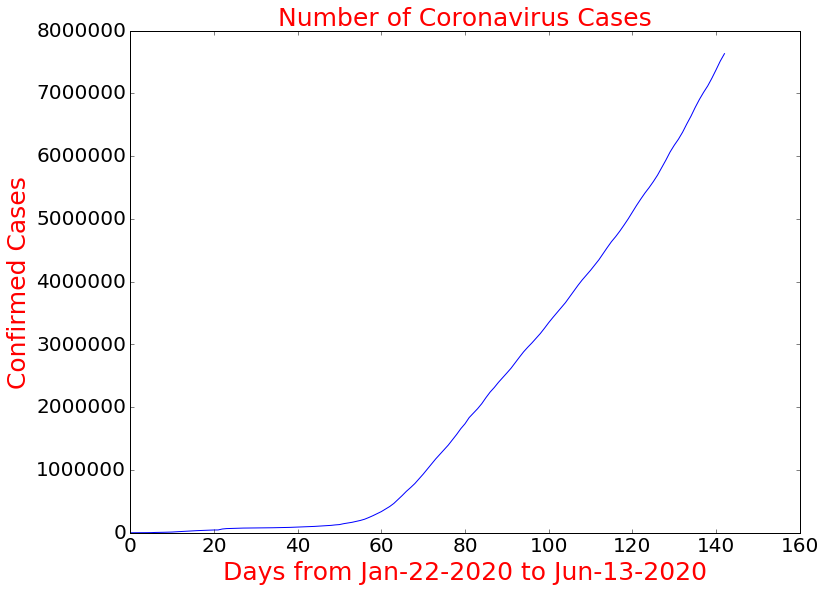

In [38]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Confirmed Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

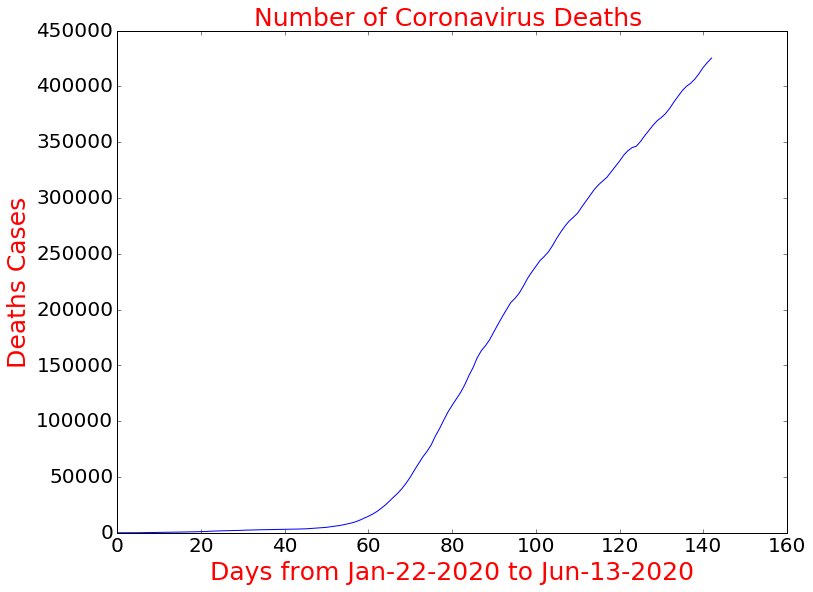

In [39]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths ', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Deaths Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

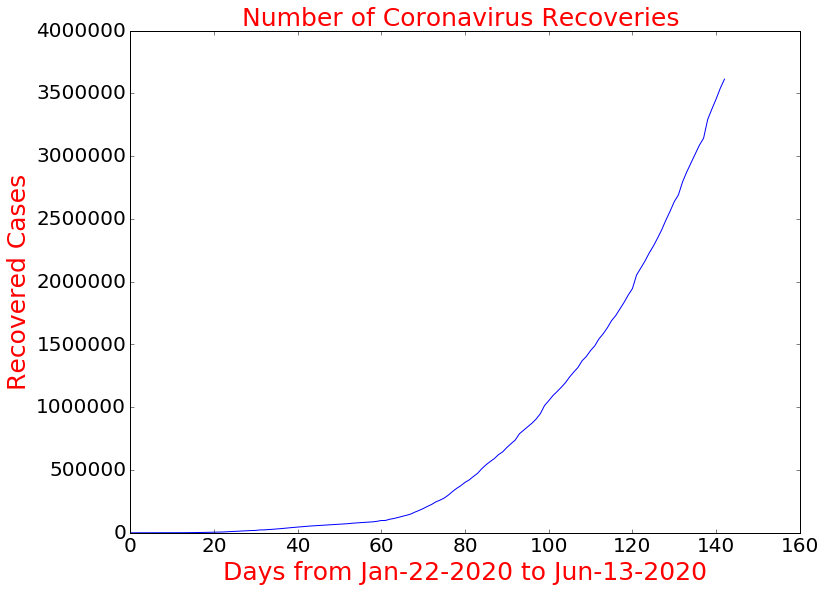

In [40]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries ', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Recovered Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# World wide daily increasing cases of COVID-19

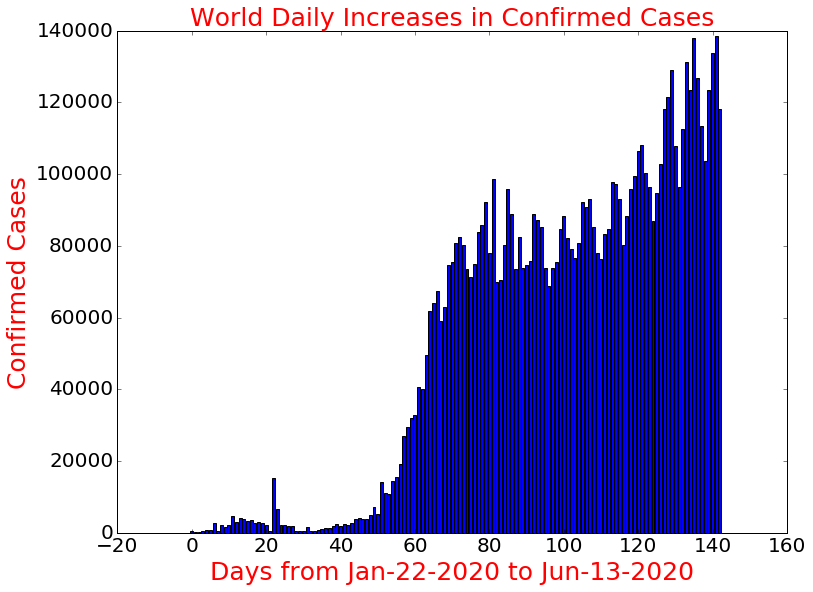

In [73]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Confirmed Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

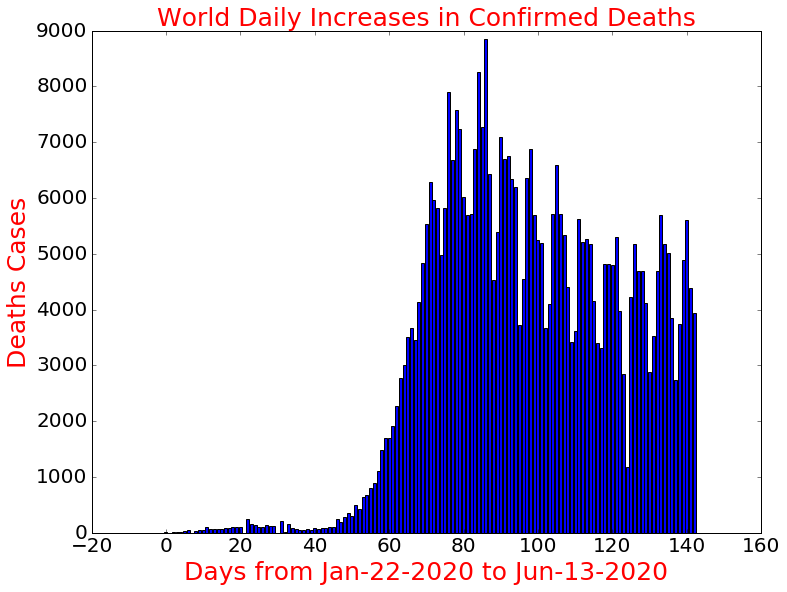

In [42]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Deaths Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

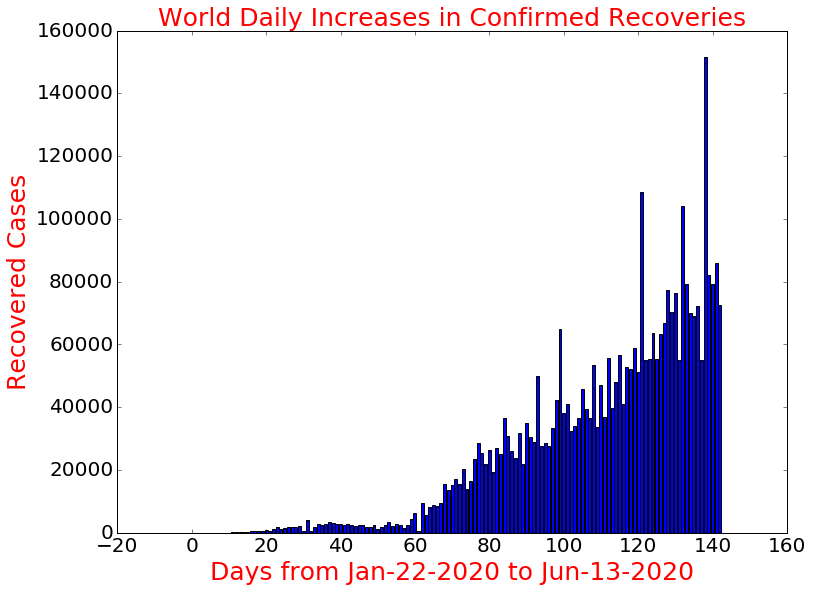

In [43]:
plt.figure(figsize=(12, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Recovered Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

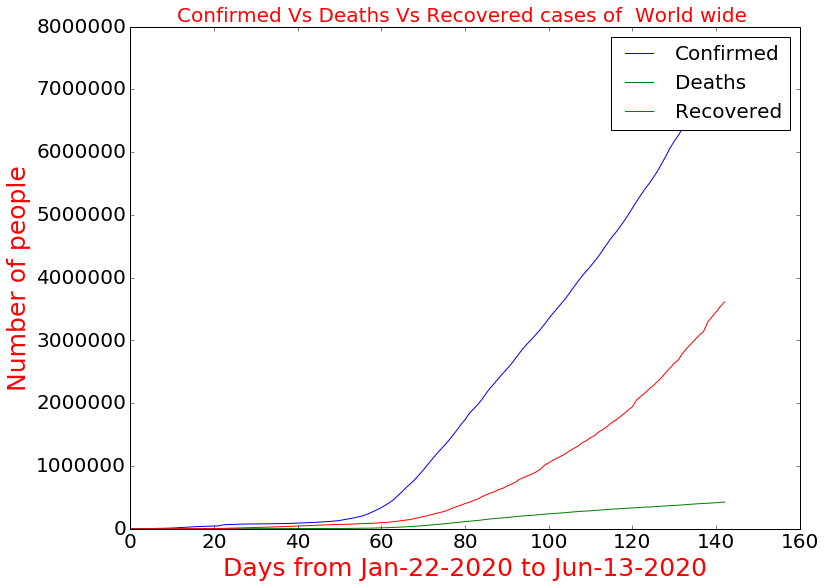

In [44]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_recovered)


plt.title('Confirmed Vs Deaths Vs Recovered cases of  World wide ', size=20,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Number of people', size=25,c='red')
plt.legend(['Confirmed', 'Deaths', 'Recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

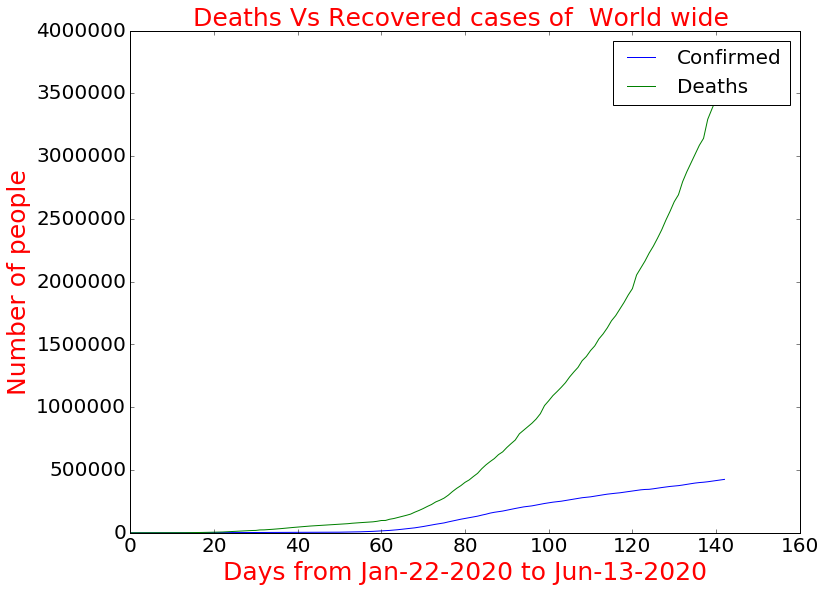

In [45]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_recovered)


plt.title('Deaths Vs Recovered cases of  World wide ', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Number of people', size=25,c='red')
plt.legend(['Confirmed', 'Deaths', 'Recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Graph of INDIA 

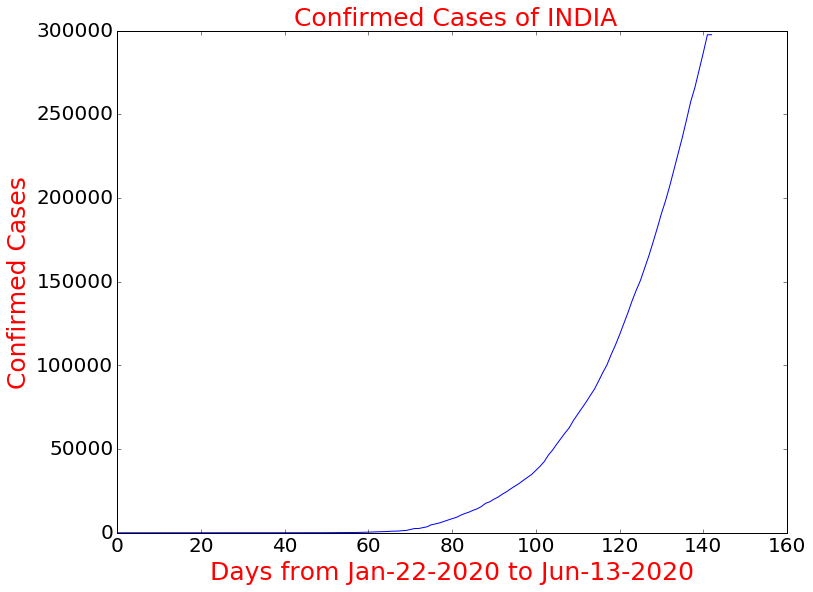

In [46]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, india_cases)
plt.title(' Confirmed Cases of INDIA', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Confirmed Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

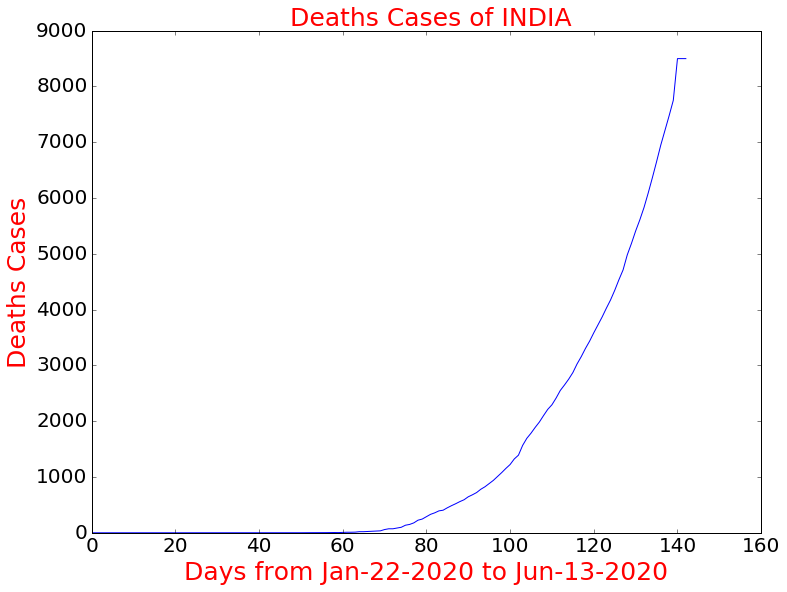

In [47]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, india_deaths)
plt.title(' Deaths Cases of INDIA', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Deaths Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

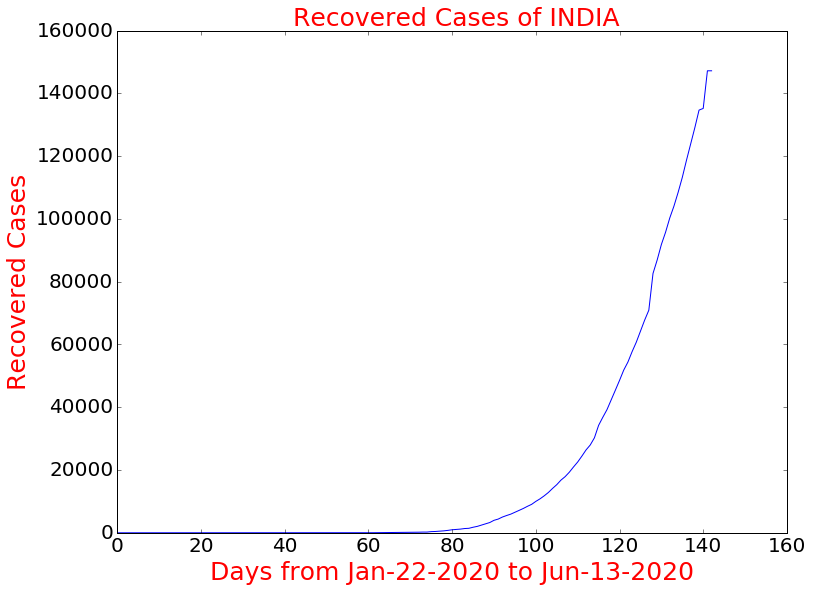

In [48]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, india_recovered)
plt.title(' Recovered Cases of INDIA', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Recovered Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

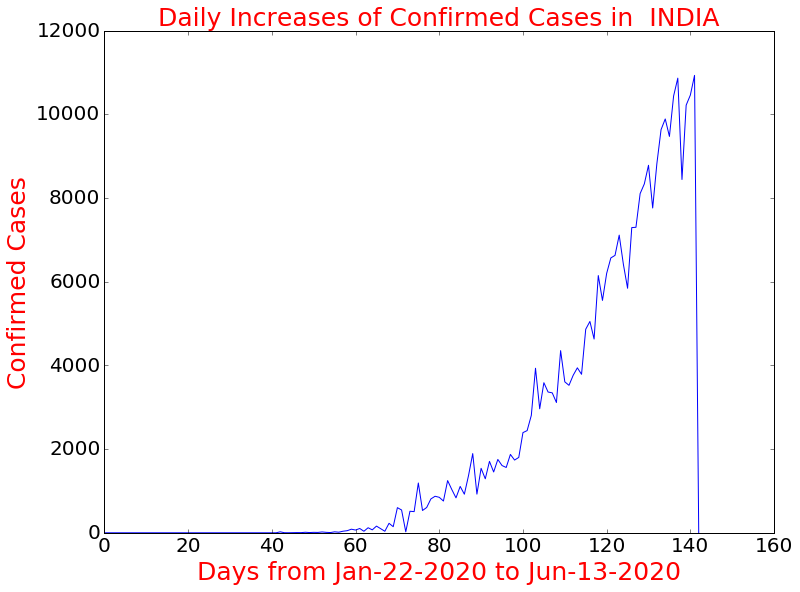

In [49]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates,india_daily_increase )
plt.title('Daily Increases of Confirmed Cases in  INDIA', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Confirmed Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

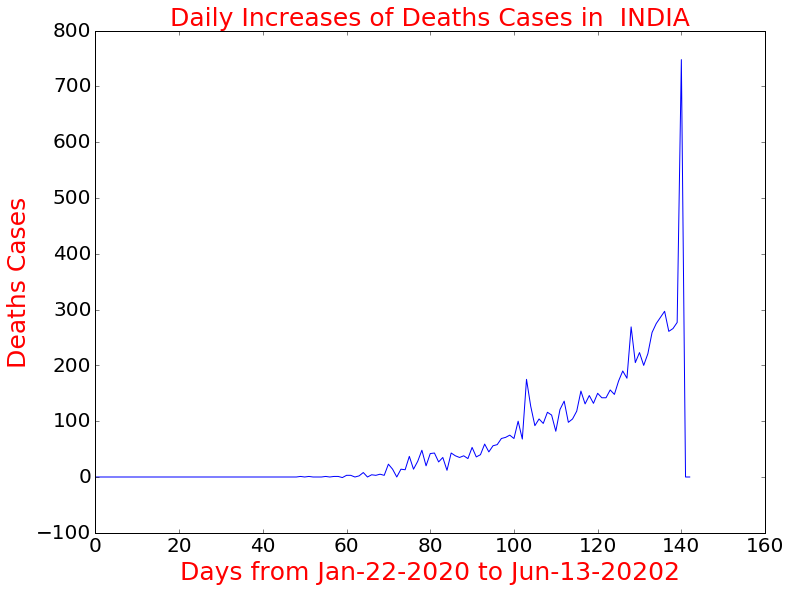

In [72]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates,india_daily_death )
plt.title('Daily Increases of Deaths Cases in  INDIA', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-20202', size=25,c='red')
plt.ylabel('Deaths Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

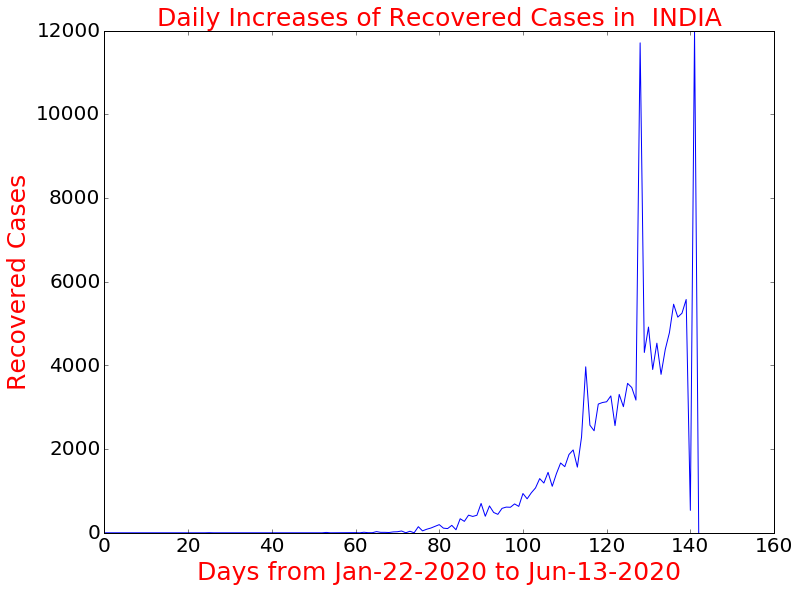

In [51]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates,india_daily_recovery )
plt.title('Daily Increases of Recovered Cases in  INDIA', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Recovered Cases', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

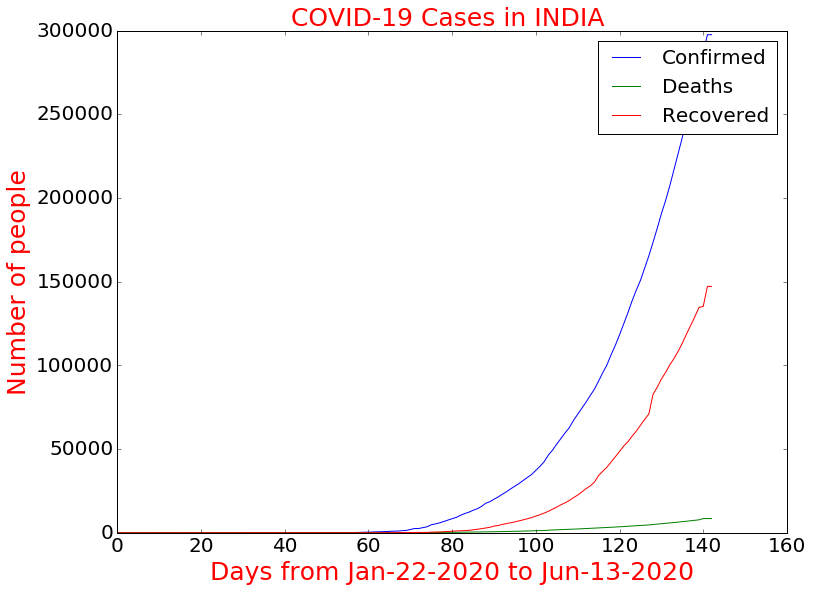

In [52]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, india_cases)
plt.plot(adjusted_dates, india_deaths)
plt.plot(adjusted_dates, india_recovered)


plt.title('COVID-19 Cases in INDIA ', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Number of people', size=25,c='red')
plt.legend(['Confirmed', 'Deaths', 'Recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

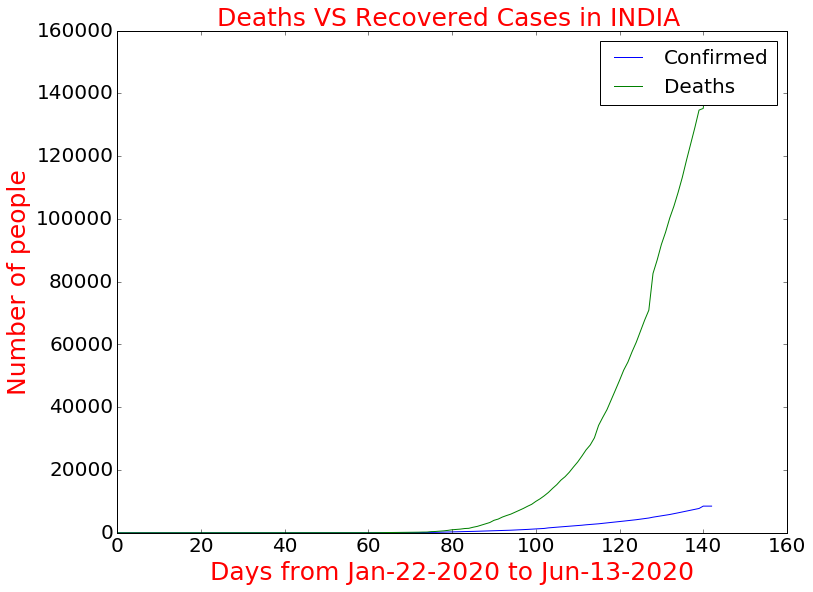

In [53]:
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, india_deaths)
plt.plot(adjusted_dates, india_recovered)


plt.title('Deaths VS Recovered Cases in INDIA ', size=25,c='red')
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Number of people', size=25,c='red')
plt.legend(['Confirmed', 'Deaths', 'Recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Predictions for confirmed coronavirus cases worldwide:-

In [68]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(12,9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases ', size=25,c='red')
    plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
    plt.ylabel(' Confirmed Cases', size=25,c='red')
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

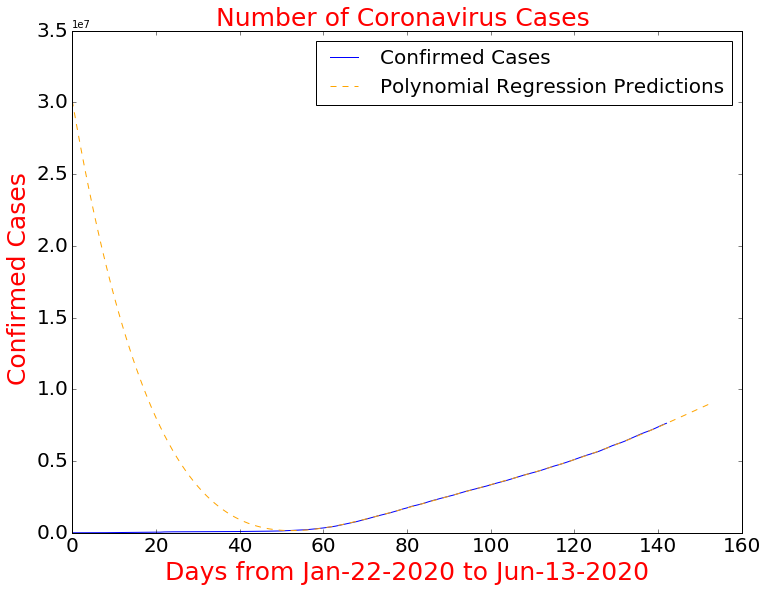

In [69]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

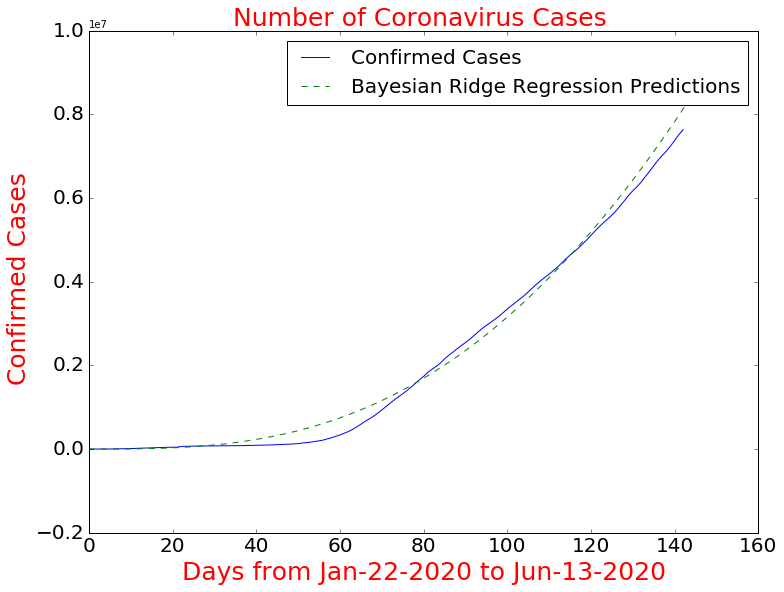

In [70]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

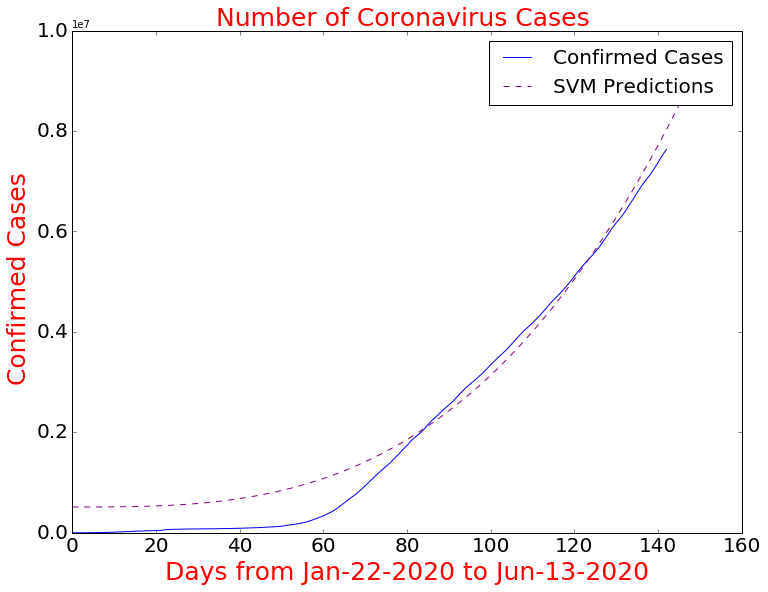

In [71]:
plot_predictions(adjusted_dates, world_cases, svm_prediction, 'SVM Predictions', 'purple')

# Future Prediction

## Future prediction using polynomial regression

In [58]:
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
svm_df

Date  Polynomial Predicted number of Confirmed Cases Worldwide
0  06/13/2020                                          7754690.0       
1  06/14/2020                                          7885949.0       
2  06/15/2020                                          8017814.0       
3  06/16/2020                                          8150129.0       
4  06/17/2020                                          8282727.0       
5  06/18/2020                                          8415424.0       
6  06/19/2020                                          8548025.0       
7  06/20/2020                                          8680321.0       
8  06/21/2020                                          8812088.0       
9  06/22/2020                                          8943088.0

# Future predictions using Bayesian Ridge

In [59]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted number of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
svm_df

Date  Bayesian Ridge Predicted number of Confirmed Cases Worldwide
0  06/13/2020                                          8275398.0           
1  06/14/2020                                          8427584.0           
2  06/15/2020                                          8581264.0           
3  06/16/2020                                          8736434.0           
4  06/17/2020                                          8893091.0           
5  06/18/2020                                          9051234.0           
6  06/19/2020                                          9210857.0           
7  06/20/2020                                          9371957.0           
8  06/21/2020                                          9534531.0           
9  06/22/2020                                          9698575.0

# Future predictions using SVM 

In [60]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted number of Confirmed Cases Worldwide': np.round(svm_prediction[-10:])})
svm_df

Date  SVM Predicted number of Confirmed Cases Worldwide
0  06/13/2020                                          8191691.0
1  06/14/2020                                          8353906.0
2  06/15/2020                                          8518390.0
3  06/16/2020                                          8685158.0
4  06/17/2020                                          8854227.0
5  06/18/2020                                          9025611.0
6  06/19/2020                                          9199328.0
7  06/20/2020                                          9375392.0
8  06/21/2020                                          9553819.0
9  06/22/2020                                          9734625.0

# Mortality Rate (worldwide) susceptible to change

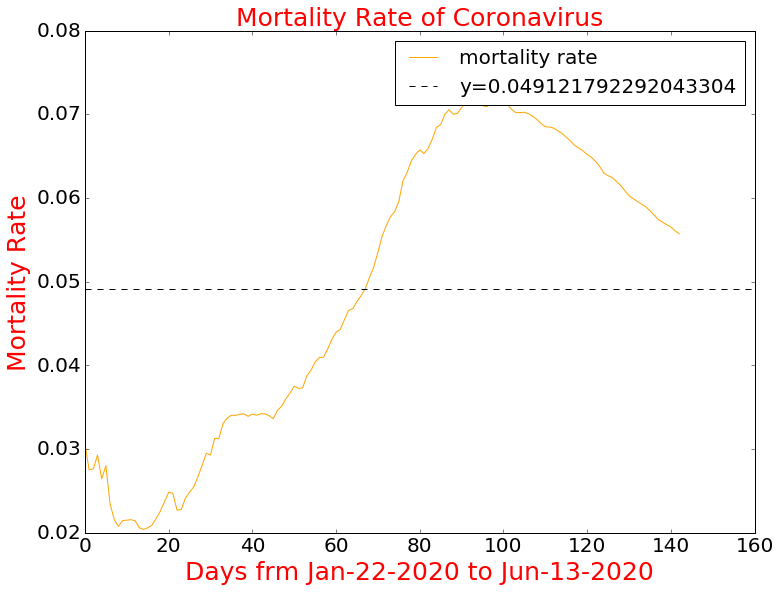

In [61]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus', size=25,c='red')
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days frm Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Mortality Rate', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Recovery Rate (worldwide) suceptible to change

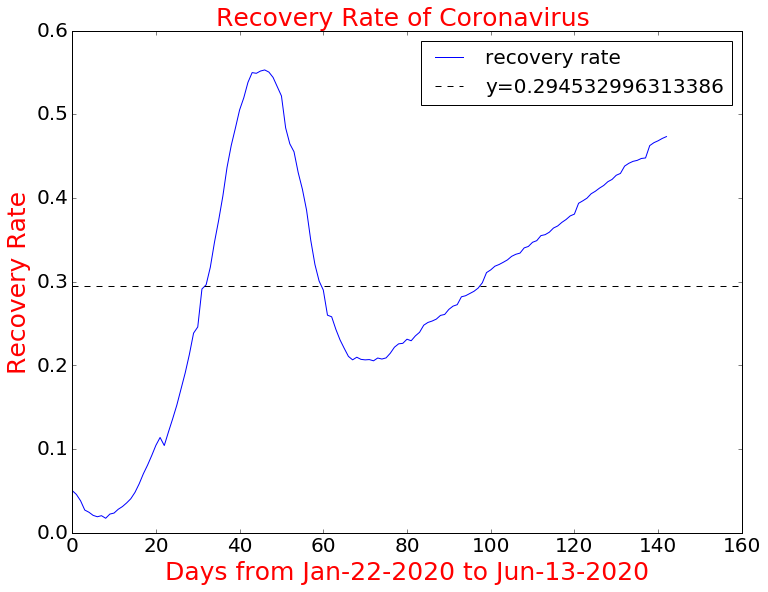

In [62]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(12, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus ', size=25,c='red')
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days from Jan-22-2020 to Jun-13-2020', size=25,c='red')
plt.ylabel('Recovery Rate', size=25,c='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Pie Chart

In [63]:
fig = px.pie(data_update[data_update["Confirmed"]>100], values="Confirmed", names="Country/Region", title="Percentage of confirmed cases per Country ", template="seaborn")
fig.update_traces(rotation=60, pull=0.05, textinfo="percent+label")
fig.show()

In [64]:
fig = px.pie(data_update[data_update["Confirmed"]>100], values="Deaths", names="Country/Region", title="Percentage of Death cases per Country ", template="seaborn")
fig.update_traces(rotation=60, pull=0.05, textinfo="percent+label")
fig.show()

In [65]:
fig = px.pie(data_update[data_update["Confirmed"]>100], values="Recovered", names="Country/Region", title="Percentage of Recovered cases per Country ", template="seaborn")
fig.update_traces(rotation=60, pull=0.05, textinfo="percent+label")
fig.show()

In [66]:
data_update["Active"] = data_update["Confirmed"] - (data_update["Deaths"]+data_update["Recovered"])
data_update

SNo ObservationDate      Province/State Country/Region  \
53198  53199      2020-06-30         Afghanistan    Afghanistan   
53199  53200      2020-06-30             Albania        Albania   
53200  53201      2020-06-30             Algeria        Algeria   
53201  53202      2020-06-30             Andorra        Andorra   
53202  53203      2020-06-30              Angola         Angola   
...      ...             ...                 ...            ...   
53922  53923      2020-06-30           Zacatecas         Mexico   
53923  53924      2020-06-30  Zakarpattia Oblast        Ukraine   
53924  53925      2020-06-30   Zaporizhia Oblast        Ukraine   
53925  53926      2020-06-30            Zhejiang          China   
53926  53927      2020-06-30     Zhytomyr Oblast        Ukraine   

              Last Update  Confirmed  Deaths  Recovered  ProvinceID  \
53198 2020-01-07 04:33:00      31517     746      14131           3   
53199 2020-01-07 04:33:00       2535      62       1459          10   
53200 2020-01-07 04:33:00      13907     912       9897          12   
53201 2020-01-07 04:33:00        855      52        799          22   
53202 2020-01-07 04:33:00        284      13         93          23   
...                   ...        ...     ...        ...         ...   
53922 2020-01-07 04:33:00        908      96        626         709   
53923 2020-01-07 04:33:00       2889      91        943         710   
53924 2020-01-07 04:33:00        572      17        418         712   
53925 2020-01-07 04:33:00       1269       1       1267         713   
53926 2020-01-07 04:33:00       1404      29        746         714   

       CountryID  Active  
53198          0   16640  
53199          1    1014  
53200          2    3098  
53201          3       4  
53202          4     178  
...          ...     ...  
53922        114     186  
53923        179    1855  
53924        179     137  
53925         36       1  
53926        179     629  

[729 rows x 11 columns]

In [67]:
fig = px.pie(data_update[data_update["Confirmed"]>100], values="Active", names="Country/Region", title="Percentage of Active cases per Country ", template="seaborn")
fig.update_traces(rotation=30, pull=0.05, textinfo="percent+label")
fig.show()